In [1]:
from bcnf.simulation.video_processing import process_video
from bcnf.utils import get_dir


import numpy as np

MovieWriter imagemagick unavailable; using Pillow instead.


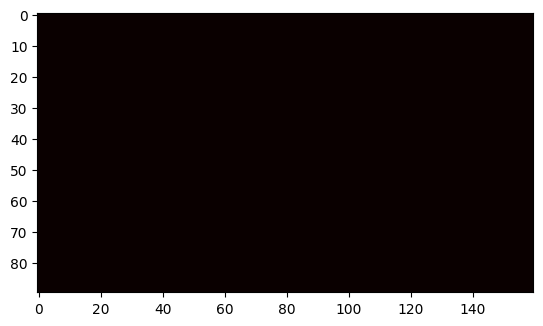

In [8]:
frames_Nikita = process_video(get_dir('data', 'bcnf-data', 'videos', 'Small_Handball', 'Small_Nikita_Handball.mp4'),
                       get_dir('data', 'bcnf-data', 'videos', 'Small_Handball'),
                       'Small_Nikita_Handball',
                       True,
                       True,
                       (16, 9),
                       zero_threshold=600)
                    

MovieWriter imagemagick unavailable; using Pillow instead.


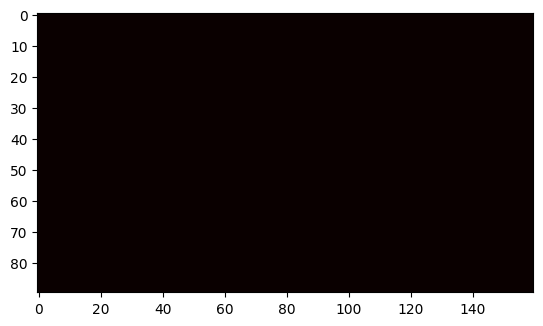

In [9]:
frames_Paul = process_video(get_dir('data', 'bcnf-data', 'videos', 'Small_Handball', 'Small_Paul_Handball.mp4'),
                       get_dir('data', 'bcnf-data', 'videos', 'Small_Handball'),
                       'Small_Paul_Handball',
                       True,
                       True,
                       (16, 9),
                       20,
                       75)
                    

In [11]:
len(frames_Nikita), len(frames_Paul)

(31, 32)

In [12]:
# replicate the last frame so each video has 60 frames
frames_Nikita = np.concatenate([frames_Nikita, [frames_Nikita[-1]] * (60 - len(frames_Nikita))])
frames_Paul = np.concatenate([frames_Paul, [frames_Paul[-1]] * (60 - len(frames_Paul))])

In [23]:
len(frames_Nikita), len(frames_Paul)

(30, 30)

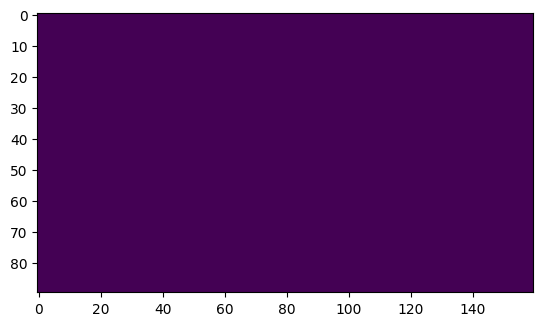

In [14]:
# show last frame of each video
import matplotlib.pyplot as plt
plt.imshow(frames_Nikita[-1])
plt.show()

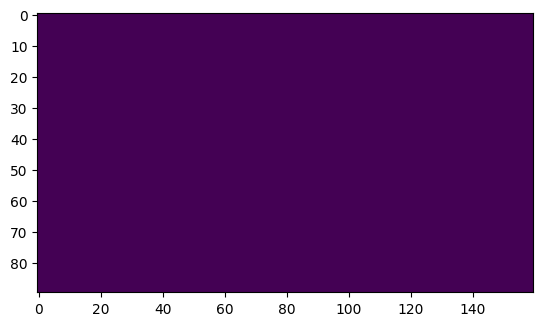

In [15]:
plt.imshow(frames_Paul[-1])
plt.show()

In [16]:
# take only every second frame to reduce the FPS to 15
frames_Nikita = frames_Nikita[::2]
frames_Paul = frames_Paul[::2]

MovieWriter imagemagick unavailable; using Pillow instead.


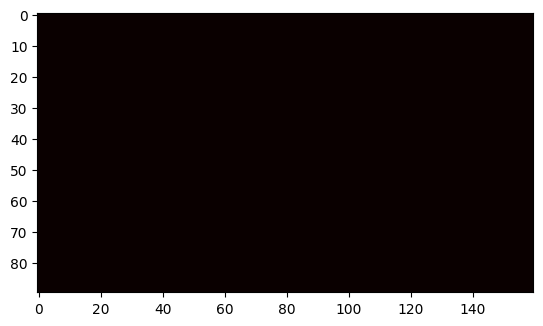

In [21]:
# make a gif of the frame

import matplotlib.animation as animation

fig = plt.figure()

ims = []
for i in range(len(frames_Nikita)):
    im = plt.imshow(frames_Nikita[i], animated=True, cmap='hot')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1/15, blit=True, repeat_delay=1000)

ani.save(get_dir('data', 'bcnf-data', 'videos', 'Small_Handball', 'Small_Nikita_Handball_gmm_2s_15FPS.gif'), writer='imagemagick', fps=15)

MovieWriter imagemagick unavailable; using Pillow instead.


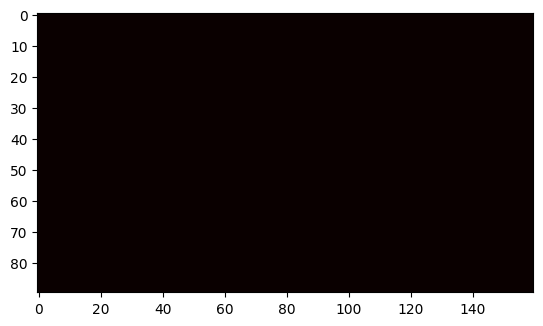

In [22]:
fig = plt.figure()

ims = []
for i in range(len(frames_Paul)):
    im = plt.imshow(frames_Paul[i], animated=True, cmap='hot')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1/15, blit=True, repeat_delay=1000)

ani.save(get_dir('data', 'bcnf-data', 'videos', 'Small_Handball', 'Small_Paul_Handball_gmm_2s_15FPS.gif'), writer='imagemagick', fps=15)

In [ ]:
# TODO: collect other cam meta data and save frames and data